In [2]:
from longi_class import LongitudinalAnalysis as la
import analysis_functions as af
import analyze as ana

In [50]:

names = af.assemble_names('/Users/davidprotter/Documents/Donaldson Lab/Sex_diff_c1/csv')
files = [file for file in sorted(names) if 'summary' not in file if 'round' not in file]
for file in files:
    print(f'file is: {os.path.split(file)[-1]}')
    ana.run_analysis_script(file)


beam_break_1_crossed   
4      5   door_1 open begin          467.467872   beam_break_1_crossed   

    beam_break_1_crossed  
0               5.592886  
1             128.430742  
2             230.764596  
3             343.225113  
4             473.761149  
file is: 6_28_2021__12_51__Door_shape_vole_4142.csv
exp is Door_shape
importing door_shape analysis module
file is: 6_28_2021__12_51__Door_shape_vole_4147.csv
exp is Door_shape
importing door_shape analysis module
file is: 6_28_2021__12_52__Door_shape_vole_4140.csv
exp is Door_shape
importing door_shape analysis module
file is: 6_28_2021__14_22__Door_shape_vole_4096.csv
exp is Door_shape
importing door_shape analysis module
file is: 6_28_2021__14_22__Door_shape_vole_4144.csv
exp is Door_shape
importing door_shape analysis module
    Round               Event   door_1 open begin
11      1   door_1 open begin            6.657434
26      2   door_1 open begin          145.251563
43      3   door_1 open begin          237.213948
60 

In [32]:

lon = la('test')



names = af.assemble_names('/Users/davidprotter/Documents/Donaldson Lab/Sex_diff_c1/csv')
round_files = [file for file in sorted(names) if 'round' in file]
for file in round_files:
    lon.add_by_round_csv(file)

/Users/davidprotter/anaconda3/envs/Computing/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/Users/davidprotter/Documents/Donaldson Lab/Don_GIT/Operant_Daily_Pipeline/longi_class.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['file'] = file


In [47]:
males= sorted(['4145','4146','4140', '4139', '4142', '4143'])
females = sorted(['4136','784','4096','4148','4144','4147'])

animal_order = males+females
lon.animal_order = animal_order

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [35]:
def make_violin(df, day = None, violin_color = None, swarm_color = 'black', inner = None, ax = None):
    

    if not ax:
        fig, ax = plt.subplots(ncols = 1, nrows = 1)
    else:
        if inner == 'stick':
            sns.violinplot(y = df.value[~np.isnan(df.value)], bw = 0.25, color = violin_color, scale = 'count', inner = inner,ax = ax)
        elif inner == 'swarm':
            sns.violinplot(y = df.value[~np.isnan(df.value)], bw = 0.25, color = violin_color, scale = 'count', ax = ax)
            sns.swarmplot(y = df.value[~np.isnan(df.value)], ax = ax, color = swarm_color)
        elif inner == 'strip':
            sns.violinplot(y = df.value[~np.isnan(df.value)], bw = 0.25, color = violin_color, scale = 'count', ax = ax)
            sns.stripplot(y = df.value[~np.isnan(df.value)], ax = ax, color = swarm_color, jitter = True)
        else:
            sns.violinplot(y = df.value[~np.isnan(df.value)], bw = 0.25, color = violin_color, scale = 'count', ax = ax)
        ax.set_title(day)
    return ax

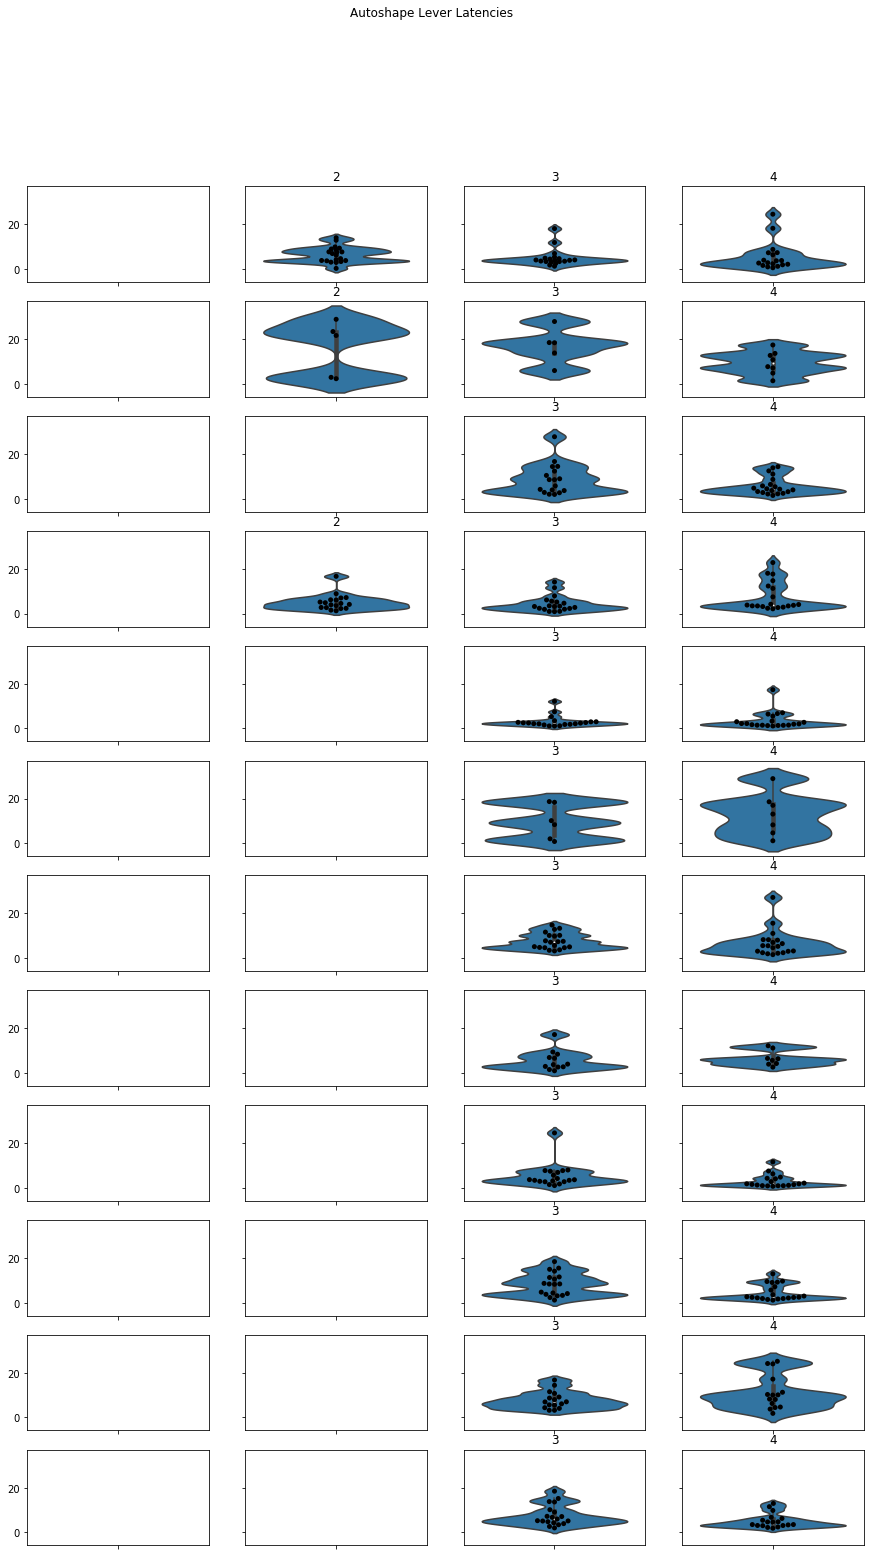

In [36]:
data = lon.metrics['food_lever_press_latency'].get_data("Autoshape", order = animal_order)

fig, axs = plt.subplots(ncols = 4, nrows = 12, figsize = (15,25), sharey = True, sharex = True)

fig.suptitle('Autoshape Lever Latencies')
for i, ani in enumerate(data.keys()):
    for day in data[ani].keys():
        this_ax = axs[i][int(day)-1]
        df = data[ani][day]
        _ = make_violin(df, day = day, ax = this_ax, inner = 'swarm')
        if day == '1':
            this_ax.set_ylabel(f'{ani}\nlatency (s)', rotation = 'horizontal', ha = 'right', va = 'center')
            
        else:
            this_ax.set_ylabel('')
        
        
        


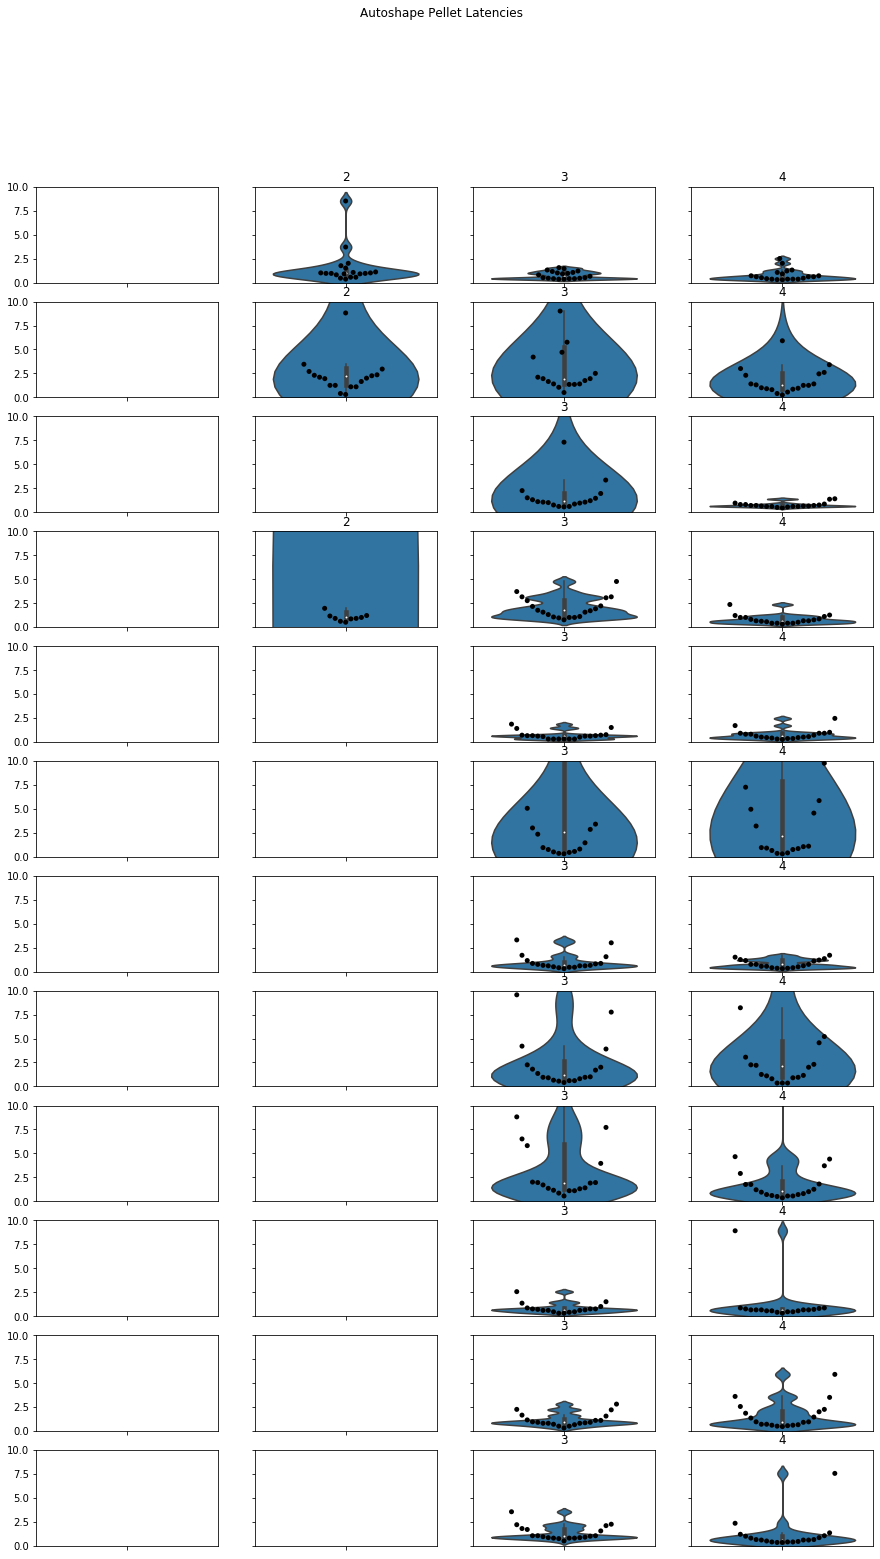

In [37]:
data = lon.metrics['pellet_latency'].get_data("Autoshape", order = animal_order)

fig, axs = plt.subplots(ncols = 4, nrows = 12, figsize = (15,25), sharey = True, sharex = True)

fig.suptitle('Autoshape Pellet Latencies')
for i, ani in enumerate(data.keys()):
    for day in data[ani].keys():
        this_ax = axs[i][int(day)-1]
        df = data[ani][day]
        _ = make_violin(df, day = day, ax = this_ax, inner = 'swarm')
        if day == '1':
            if ani in males:
                number = f'M {ani}'
            else:
                number = f'F {ani}'
            this_ax.set_ylabel(f'{number}\nlatency (s)', rotation = 'horizontal', ha = 'right', va = 'center')
            
        else:
            this_ax.set_ylabel('')
    this_ax.set_ybound(0,10)

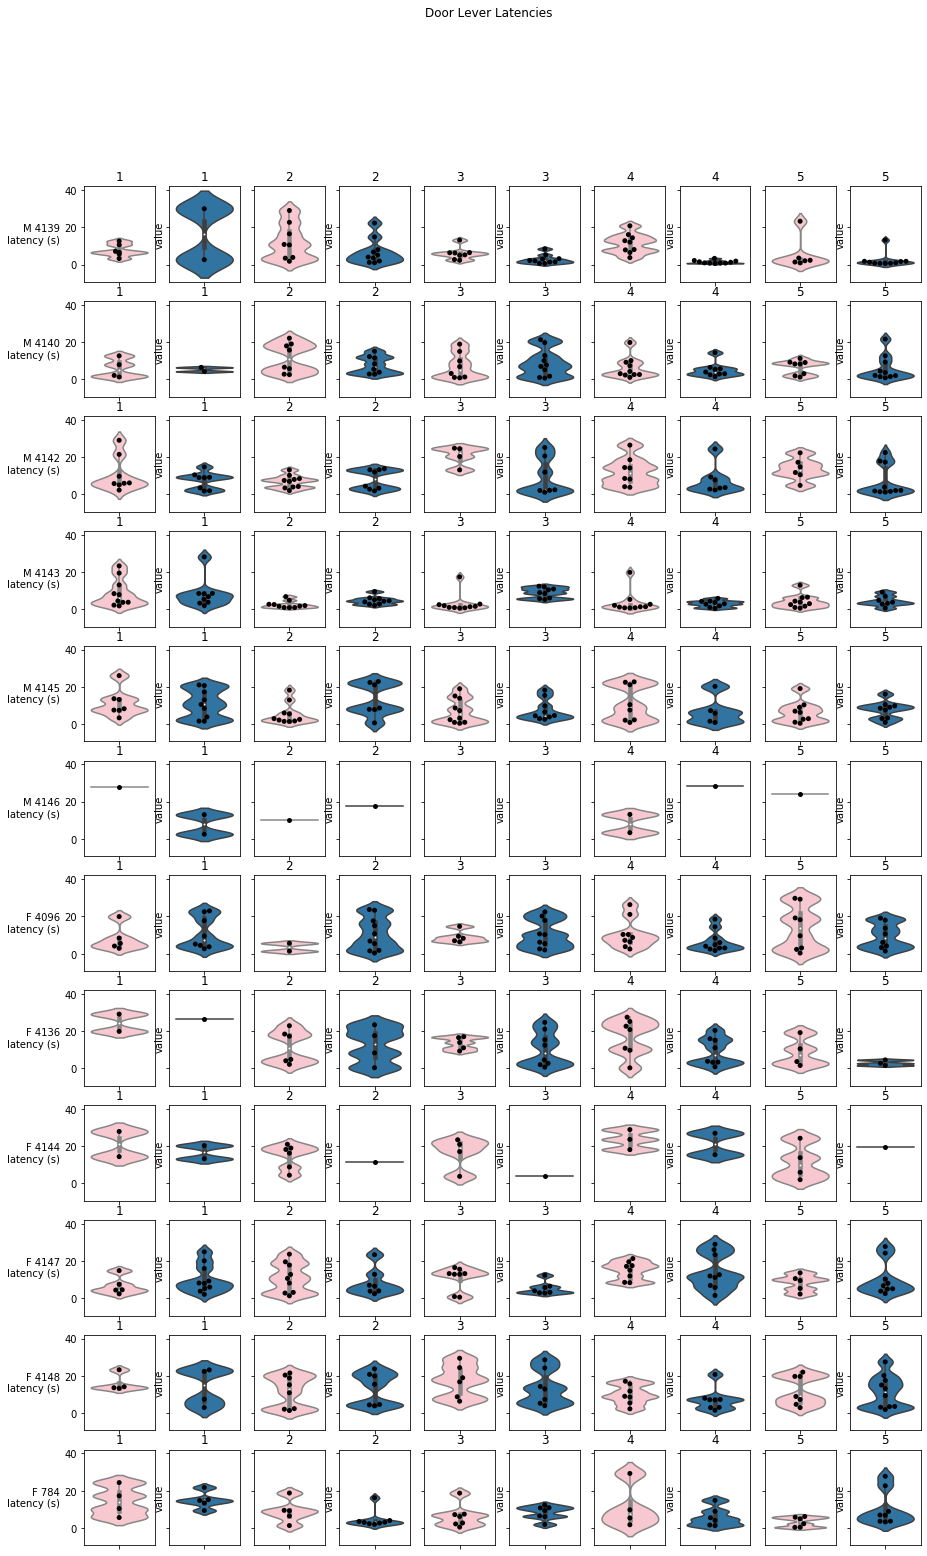

In [38]:
data = lon.metrics['door_1_lever_press_latency'].get_data("Door_shape", order = animal_order)
data2 = lon.metrics['door_2_lever_press_latency'].get_data("Door_shape", order = animal_order)

fig, axs = plt.subplots(ncols = 10, nrows = 12, figsize = (15,25), sharey = True)

fig.suptitle('Door Lever Latencies')
for i, ani in enumerate(data.keys()):
    for day in data[ani].keys():
        this_ax = axs[i][(int(day)-1)*2]
        this_ax_d2 = axs[i][(int(day)-1)*2+1]

        df = data[ani][day]
        _ = make_violin(df, day = day, ax = this_ax, violin_color = 'pink',inner = 'swarm')
        df2 = data2[ani][day]
        _ = make_violin(df2, day = day, ax = this_ax_d2,inner = 'swarm')
        if day == '1':
            if ani in males:
                number = f'M {ani}'
            else:
                number = f'F {ani}'
            this_ax.set_ylabel(f'{number}\nlatency (s)', rotation = 'horizontal', ha = 'right', va = 'center')
            
        else:
            this_ax.set_ylabel('')

'4096'

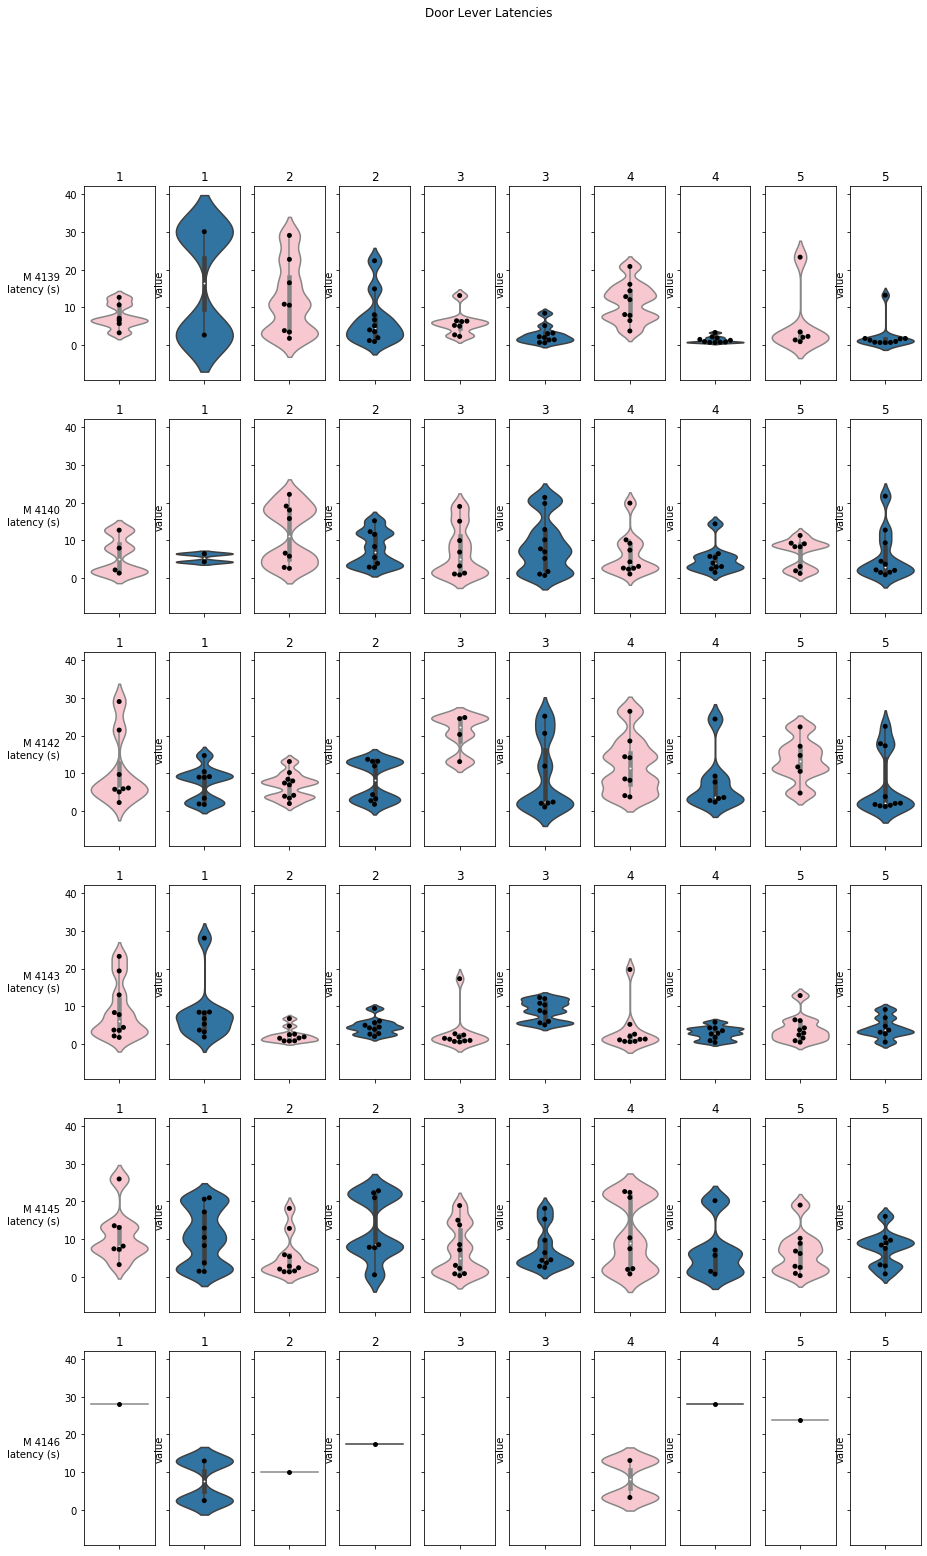

In [48]:
data = lon.metrics['door_1_lever_press_latency'].get_data("Door_shape", order = animal_order)
data2 = lon.metrics['door_2_lever_press_latency'].get_data("Door_shape", order = animal_order)

fig, axs = plt.subplots(ncols = 10, nrows = 6, figsize = (15,25), sharey = True)

fig.suptitle('Door Lever Latencies')
for i, ani in enumerate(males):
    for day in data[ani].keys():
        this_ax = axs[i][(int(day)-1)*2]
        this_ax_d2 = axs[i][(int(day)-1)*2+1]

        df = data[ani][day]
        _ = make_violin(df, day = day, ax = this_ax, violin_color = 'pink',inner = 'swarm')
        df2 = data2[ani][day]
        _ = make_violin(df2, day = day, ax = this_ax_d2,inner = 'swarm')
        if day == '1':
            if ani in males:
                number = f'M {ani}'
            else:
                number = f'F {ani}'
            this_ax.set_ylabel(f'{number}\nlatency (s)', rotation = 'horizontal', ha = 'right', va = 'center')
            
        else:
            this_ax.set_ylabel('')

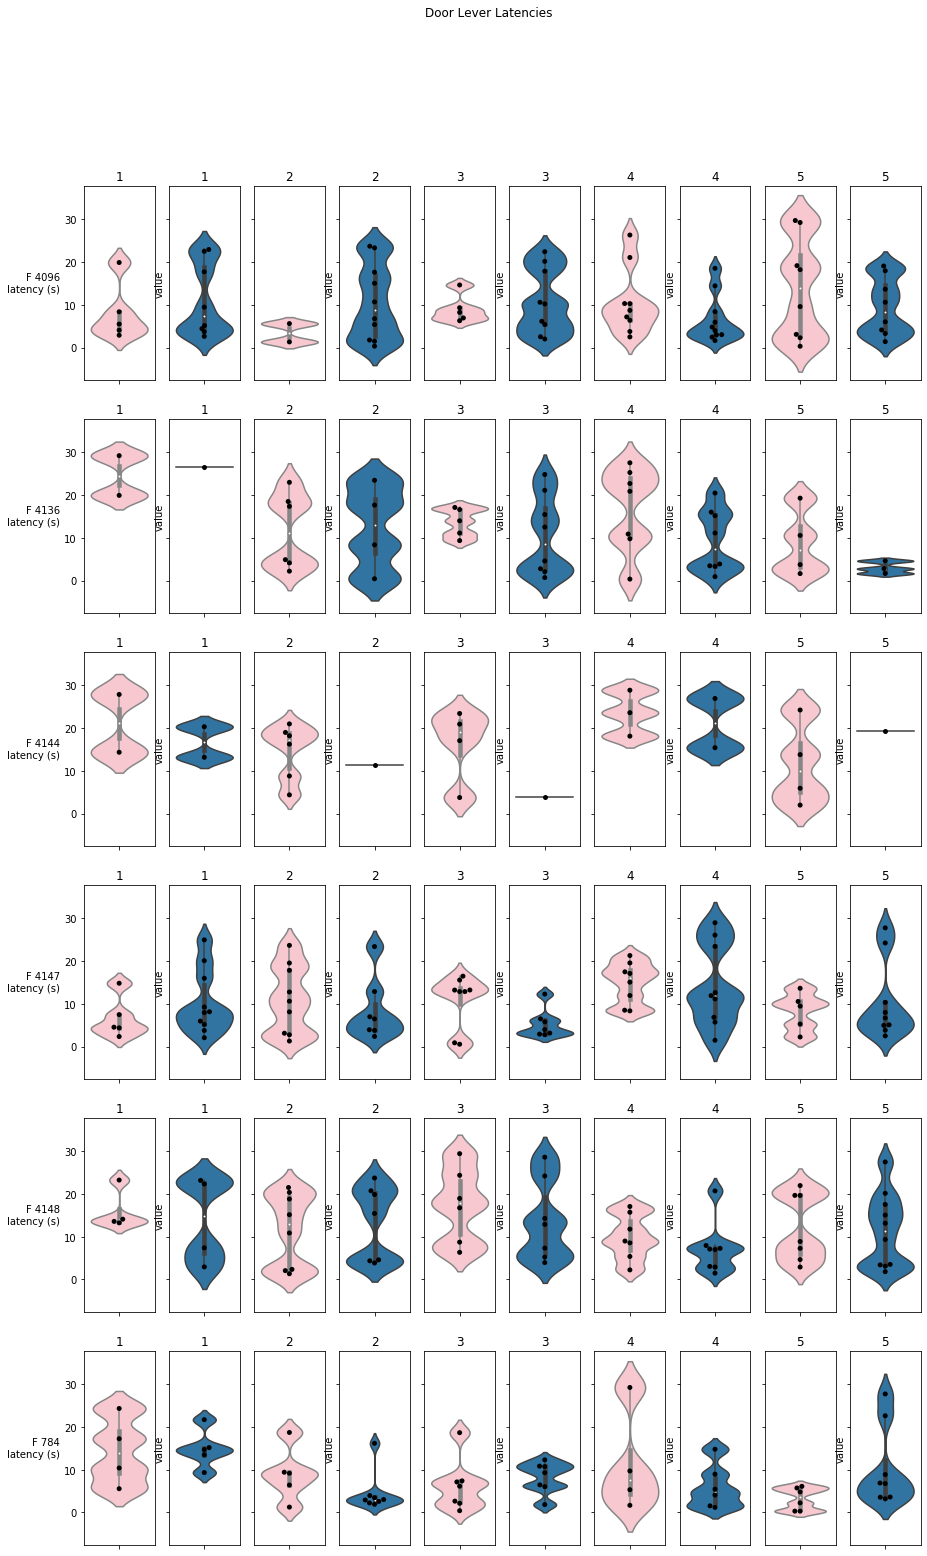

In [49]:
data = lon.metrics['door_1_lever_press_latency'].get_data("Door_shape", order = animal_order)
data2 = lon.metrics['door_2_lever_press_latency'].get_data("Door_shape", order = animal_order)

fig, axs = plt.subplots(ncols = 10, nrows = 6, figsize = (15,25), sharey = True)

fig.suptitle('Door Lever Latencies')
for i, ani in enumerate(females):
    for day in data[ani].keys():
        this_ax = axs[i][(int(day)-1)*2]
        this_ax_d2 = axs[i][(int(day)-1)*2+1]

        df = data[ani][day]
        _ = make_violin(df, day = day, ax = this_ax, violin_color = 'pink',inner = 'swarm')
        df2 = data2[ani][day]
        _ = make_violin(df2, day = day, ax = this_ax_d2,inner = 'swarm')
        if day == '1':
            if ani in males:
                number = f'M {ani}'
            else:
                number = f'F {ani}'
            this_ax.set_ylabel(f'{number}\nlatency (s)', rotation = 'horizontal', ha = 'right', va = 'center')
            
        else:
            this_ax.set_ylabel('')

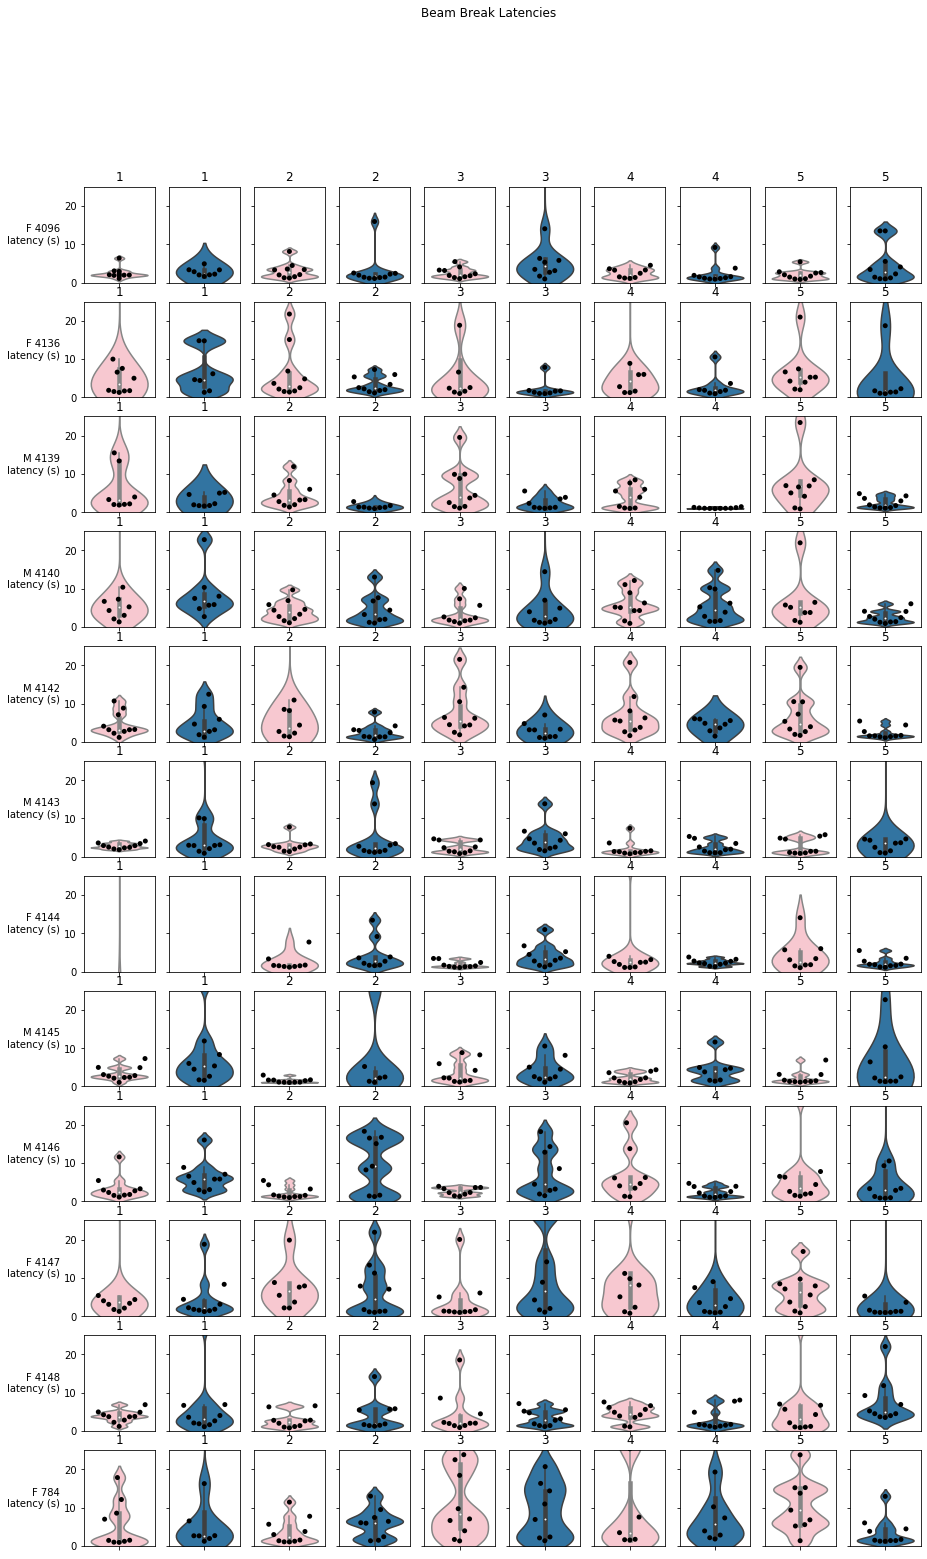

In [39]:
data = lon.metrics['latency_beam_break_door1'].get_data("Door_shape")
data2 = lon.metrics['latency_beam_break_door2'].get_data("Door_shape")

fig, axs = plt.subplots(ncols = 10, nrows = 12, figsize = (15,25), sharey = True)

fig.suptitle('Beam Break Latencies')
for i, ani in enumerate(data.keys()):
    for day in data[ani].keys():
        this_ax = axs[i][(int(day)-1)*2]
        this_ax_d2 = axs[i][(int(day)-1)*2+1]

        df = data[ani][day]
        _ = make_violin(df, day = day, ax = this_ax, violin_color = 'pink', inner = 'swarm')
        df2 = data2[ani][day]
        _ = make_violin(df2, day = day, ax = this_ax_d2, inner = 'swarm')
        if day == '1':
            if ani in males:
                number = f'M {ani}'
            else:
                number = f'F {ani}'
            this_ax.set_ylabel(f'{number}\nlatency (s)', rotation = 'horizontal', ha = 'right', va = 'center')
            
        else:
            this_ax.set_ylabel('')
        this_ax_d2.set_ylabel('')
    this_ax.set_ybound((0,25))
        

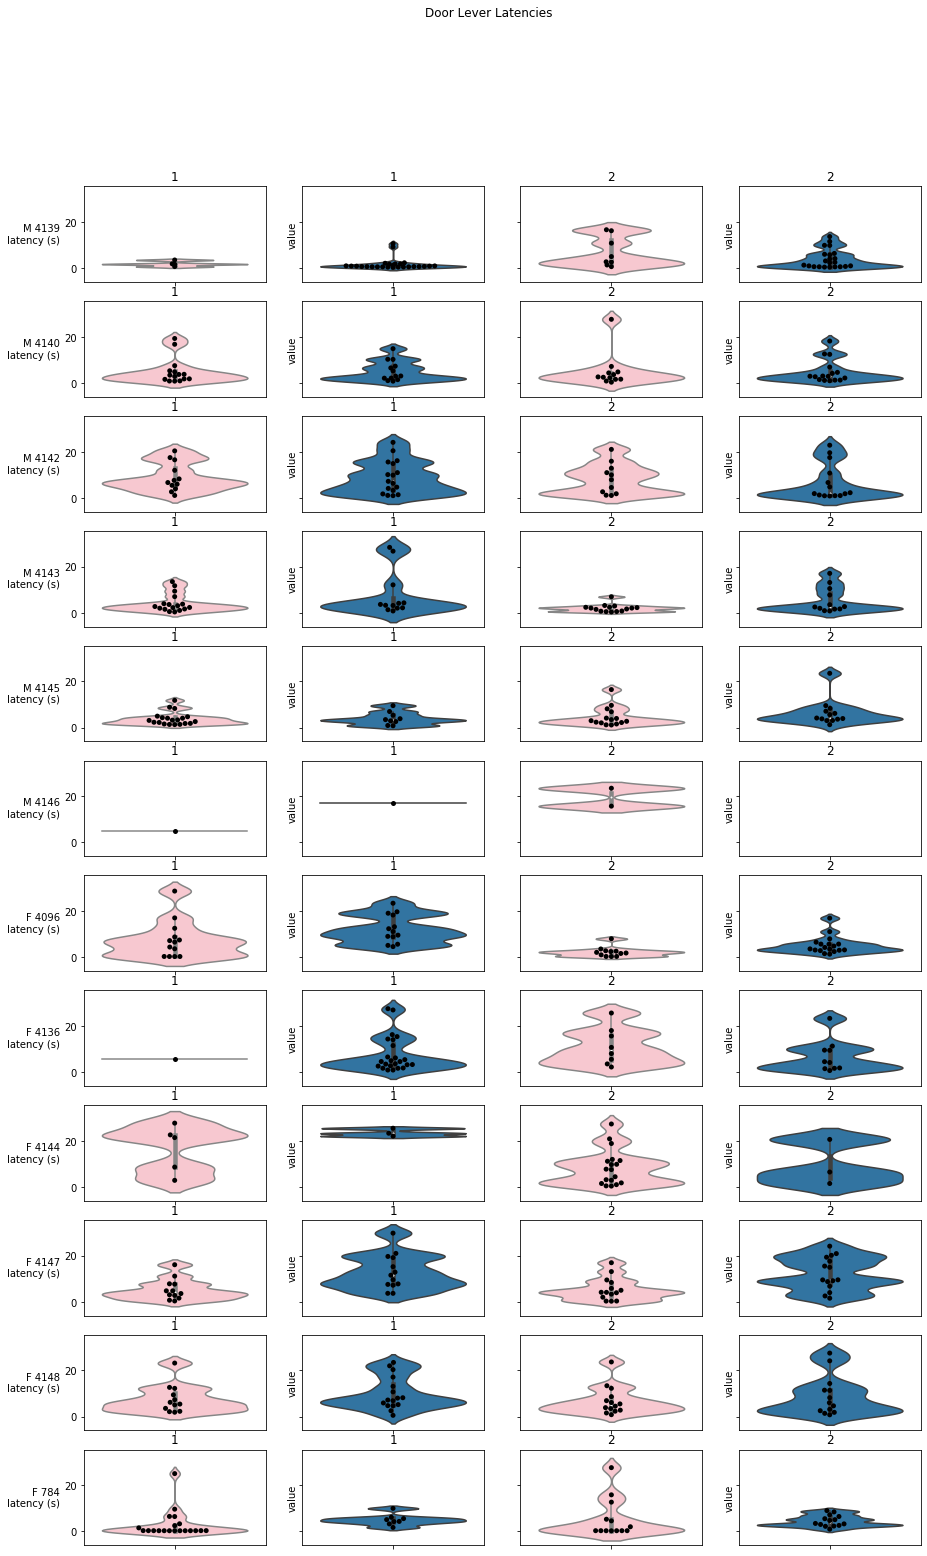

In [40]:
data = lon.metrics['door_1_lever_press_latency'].get_data("Door_test", order = animal_order)
data2 = lon.metrics['door_2_lever_press_latency'].get_data("Door_test", order = animal_order)

fig, axs = plt.subplots(ncols = 4, nrows = 12, figsize = (15,25), sharey = True)

fig.suptitle('Door Lever Latencies')
for i, ani in enumerate(data.keys()):
    for day in data[ani].keys():
        this_ax = axs[i][(int(day)-1)*2]
        this_ax_d2 = axs[i][(int(day)-1)*2+1]

        df = data[ani][day]
        _ = make_violin(df, day = day, ax = this_ax, violin_color = 'pink', inner = 'swarm')
        df2 = data2[ani][day]
        _ = make_violin(df2, day = day, ax = this_ax_d2, inner = 'swarm')
        if day == '1':
            if ani in males:
                number = f'M {ani}'
            else:
                number = f'F {ani}'
            this_ax.set_ylabel(f'{number}\nlatency (s)', rotation = 'horizontal', ha = 'right', va = 'center')
            
        else:
            this_ax.set_ylabel('')

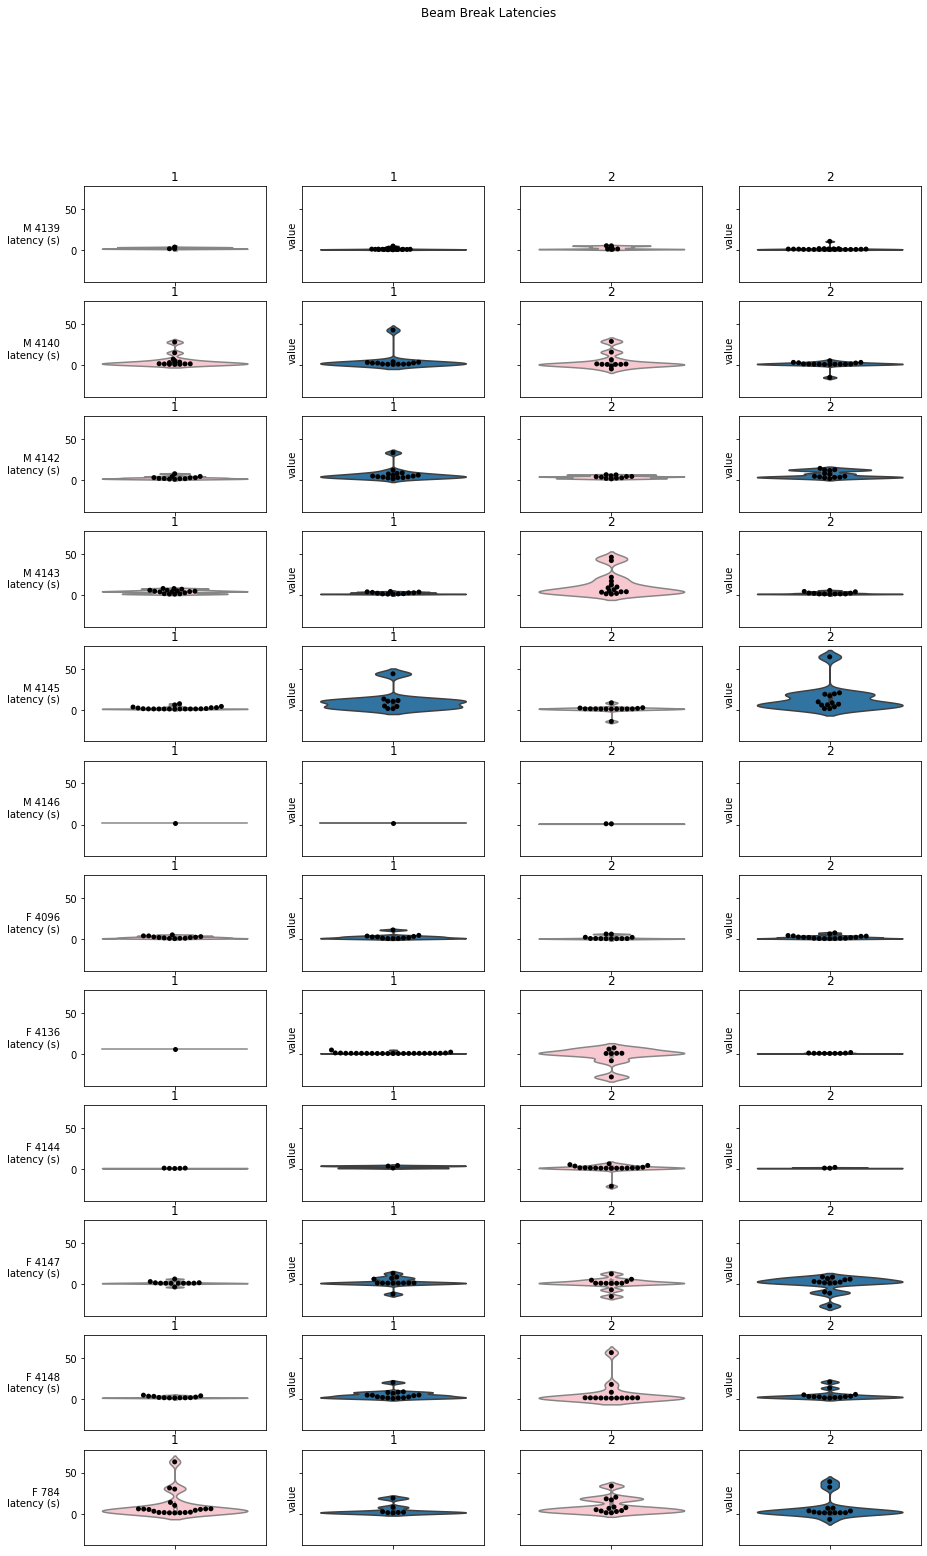

In [41]:
data = lon.metrics['latency_beam_break_door1'].get_data("Door_test", order = animal_order)
data2 = lon.metrics['latency_beam_break_door2'].get_data("Door_test", order = animal_order)

fig, axs = plt.subplots(ncols = 4, nrows = 12, figsize = (15,25), sharey = True)

fig.suptitle('Beam Break Latencies')
for i, ani in enumerate(data.keys()):
    for day in data[ani].keys():
        this_ax = axs[i][(int(day)-1)*2]
        this_ax_d2 = axs[i][(int(day)-1)*2+1]

        df = data[ani][day]
        _ = make_violin(df, day = day, ax = this_ax, violin_color = 'pink', inner = 'swarm')
        df2 = data2[ani][day]
        _ = make_violin(df2, day = day, ax = this_ax_d2, inner = 'swarm')
        if day == '1':
            if ani in males:
                number = f'M {ani}'
            else:
                number = f'F {ani}'
            this_ax.set_ylabel(f'{number}\nlatency (s)', rotation = 'horizontal', ha = 'right', va = 'center')
            
        else:
            this_ax.set_ylabel('')

In [42]:
lon.metrics['door_1_lever_press_latency'].data['4136']

{'Door_shape': {'1':     Round      value                                               file
  0       0        NaN  /Users/davidprotter/Documents/Donaldson Lab/Se...
  1       1        NaN  /Users/davidprotter/Documents/Donaldson Lab/Se...
  2       2        NaN  /Users/davidprotter/Documents/Donaldson Lab/Se...
  3       3  19.938186  /Users/davidprotter/Documents/Donaldson Lab/Se...
  4       4        NaN  /Users/davidprotter/Documents/Donaldson Lab/Se...
  5       5  29.237146  /Users/davidprotter/Documents/Donaldson Lab/Se...
  6       6        NaN  /Users/davidprotter/Documents/Donaldson Lab/Se...
  7       7        NaN  /Users/davidprotter/Documents/Donaldson Lab/Se...
  8       8        NaN  /Users/davidprotter/Documents/Donaldson Lab/Se...
  9       9        NaN  /Users/davidprotter/Documents/Donaldson Lab/Se...
  10     10        NaN  /Users/davidprotter/Documents/Donaldson Lab/Se...
  11     11        NaN  /Users/davidprotter/Documents/Donaldson Lab/Se...
  12     12        

In [ ]:
import analyze as ana

In [ ]:
_,_, df = ana.prep_for_analysis('/Users/davidprotter/Documents/Donaldson Lab/Sex_diff_c1/csv/6_25_2021__14_12__Door_shape_vole_4145.csv')

In [ ]:
af.latency_to_beam_break(df)